Mean Absolute Error: 0.1793 eV
R² Score: 0.0030


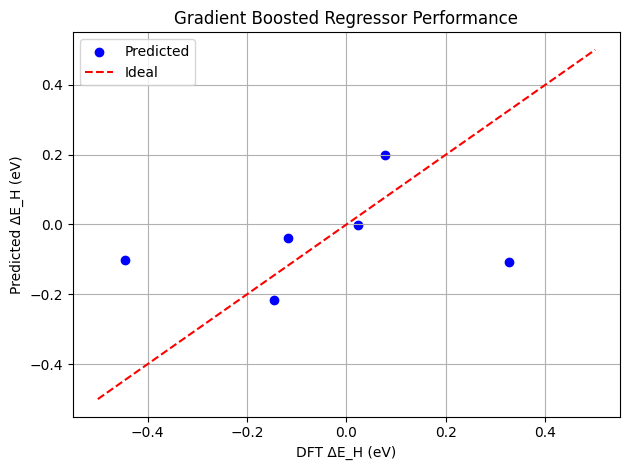

In [2]:
# HER - Gradient Boosted Regressor Model for ΔE_H prediction

import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load dataset
X = np.loadtxt('hcp_hollow_29_microstructures.csv', delimiter=",", skiprows=1, usecols=range(15))
y = np.loadtxt('hcp_hollow_29_microstructures.csv', delimiter=",", skiprows=1, usecols=15)

# Normalize input features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train GBR model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.4f} eV")
print(f"R² Score: {r2:.4f}")

# Plot predicted vs DFT
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.plot([-0.5, 0.5], [-0.5, 0.5], 'r--', label='Ideal')
plt.xlabel('DFT ΔE_H (eV)')
plt.ylabel('Predicted ΔE_H (eV)')
plt.title('Gradient Boosted Regressor Performance')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
